<a href="https://colab.research.google.com/github/Trulete/PIA/blob/main/Zalando_Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# https://www.kaggle.com/datasets/zalando-research/fashionmnist
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [28]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [29]:
test_images.shape

(10000, 28, 28)

In [30]:
display(np.unique(train_labels))
display(np.unique(test_labels))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [32]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape((28,28)))
    label_index = int(train_labels[i])
    plt.title(class_names[label_index])
plt.show()

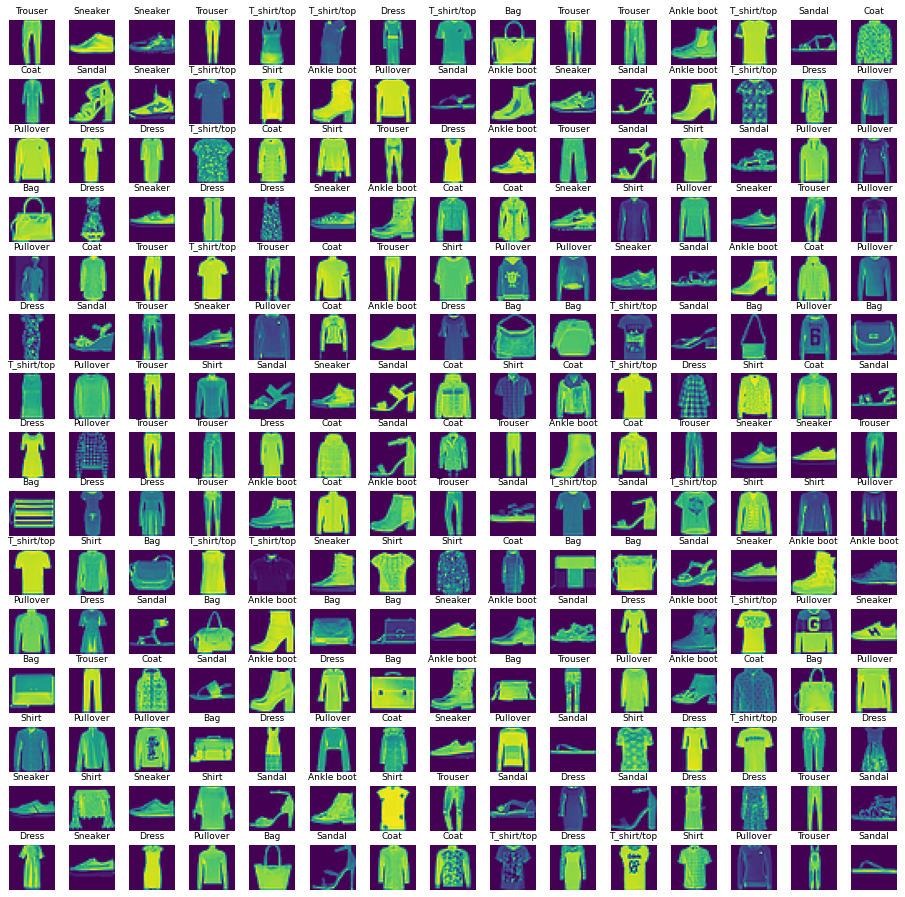

In [35]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_images) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_images[index].reshape((28,28)) )
    labelindex = int(train_labels[index])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

In [36]:
# Crear un modelo de red neuronal
model = Sequential()

# Agregar una capa de entrada que aplane la imagen en un vector de una sola dimensión
model.add(Flatten(input_shape=train_images.shape[1:]))

# Agregar dos capas ocultas con la función de activación ReLU y la capa de abandono
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Agregar una capa de salida con la función de activación softmax
model.add(Dense(10, activation='softmax'))

In [37]:
# Compilar el modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
# Entrenar el modelo con un earlyStopper y reducción de la tasa de aprendizaje
early_stop = EarlyStopping(monitor='val_loss', patience=12, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, mode='min', min_lr=0.0001, verbose=1)

history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=100, batch_size=128, callbacks=[early_stop,reduce_lr])

Epoch 1/100
469/469 [==============================] - 5s 8ms/step - loss: 0.9295 - accuracy: 0.6699 - val_loss: 0.5128 - val_accuracy: 0.8178 - lr: 0.0010
Epoch 2/100
469/469 [==============================] - 4s 9ms/step - loss: 0.5988 - accuracy: 0.7898 - val_loss: 0.4600 - val_accuracy: 0.8370 - lr: 0.0010
Epoch 3/100
469/469 [==============================] - 4s 9ms/step - loss: 0.5339 - accuracy: 0.8138 - val_loss: 0.4333 - val_accuracy: 0.8485 - lr: 0.0010
Epoch 4/100
469/469 [==============================] - 6s 13ms/step - loss: 0.5035 - accuracy: 0.8247 - val_loss: 0.4239 - val_accuracy: 0.8475 - lr: 0.0010
Epoch 5/100
469/469 [==============================] - 7s 14ms/step - loss: 0.4831 - accuracy: 0.8310 - val_loss: 0.4087 - val_accuracy: 0.8555 - lr: 0.0010
Epoch 6/100
469/469 [==============================] - 6s 12ms/step - loss: 0.4671 - accuracy: 0.8363 - val_loss: 0.3979 - val_accuracy: 0.8584 - lr: 0.0010
Epoch 7/100
469/469 [==============================] - 5s 11m

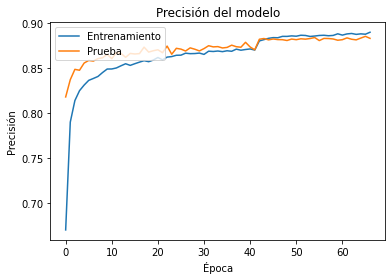

In [39]:
# Gráfico mostrando la precisión del modelo durante el entrenamiento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

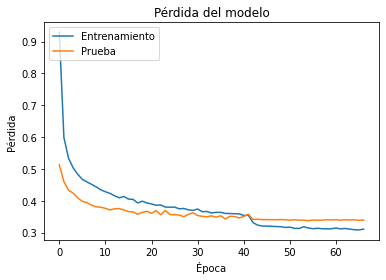

In [40]:
# Gráfico mostrando la pérdida del modelo durante el entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

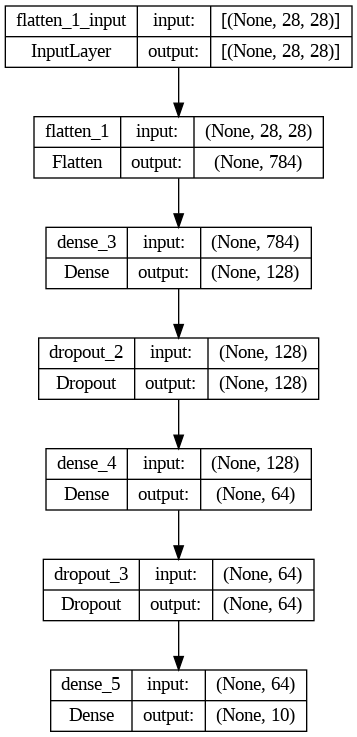

In [41]:
# Visualizacion de la estructura del modelo
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

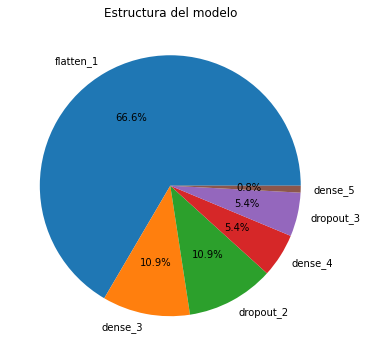

In [42]:
# Obtener la estructura del modelo
model_layers = [layer.output for layer in model.layers]
layer_names = [layer.name for layer in model.layers]

# Crear el diagrama
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Estructura del modelo')
ax.axis('off')
_ = plt.pie([layer.shape[-1] for layer in model_layers], labels=layer_names, autopct='%1.1f%%')
plt.show()